In [3]:
import numpy as np

## 1. Feedforward: Building a ReLU neural net-work

### 1.3

In [6]:
def relu(x):
    return np.maximum(0, np.array(x))

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-np.array(x)))

In [13]:
def ff_nn_ReLu(X, W, V, b, c):
    out = np.dot(relu(np.dot(X, W) + b), V) + c
    return sigmoid(out)

### 1.4

In [14]:
X = np.array([[1, -1], [0, -1], [0, 1]])
W = np.array([[1, -1, 0, 1], [0, 0, 0.5, 1]])
V = np.array([1, 0, -1, 1])
b = np.array([0, 0, 1, 0])
c = np.array([1])

In [16]:
y = ff_nn_ReLu(X, W, V, b, c)

In [17]:
print("Probabilities: ", list(y))

Probabilities:  [0.8175744761936437, 0.6224593312018546, 0.6224593312018546]


## 2. Gradient Descent 

### 2.1. What are the partial derivatives of f with respect to x and to y?

$$
\frac{d}{dx} f(x,y) = -3x^2 + 100x -200y^2
$$

$$
\frac{d}{dy} f(x,y) = 800y^3 - 400xy
$$

### 2.2. Create a visualization of the contours of this function.

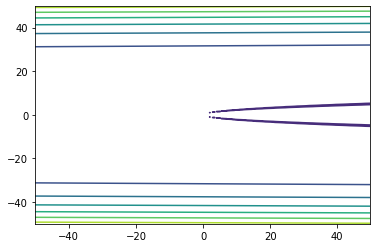

In [205]:
import matplotlib.pyplot as plt 
import numpy as np 
  
feature_x = np.arange(-50, 50, 0.25) 
feature_y = np.arange(-50, 50, 0.25) 
  
X, Y = np.meshgrid(feature_x, feature_y) 
  
Z = (3-X**2) + 50*(2*Y**2-X)**2  
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### 2.3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [253]:
def f(x, y):
    return (3-x**3) + 50*(2*y**2-x)**2

In [254]:
def dfdx(x, y):
    return -3*x**2 + 100*x -200*y**2

In [255]:
def dfdy(x, y):
    return 800*y**3 - 400*x*y

In [256]:
def grad_f(x, y):
    return np.array([dfdx(x, y), dfdy(x, y)]) 

In [257]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    # your code here
    # be sure to store and return the entire trajectory -- i.e. the results at
    # each step -- as a list or array 
    if not starting_point:
        point = np.random.uniform(-10, 10, size=2)
    else:
        point = starting_point
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point[0], point[1])
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

/Users/shrewdli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/Users/shrewdli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


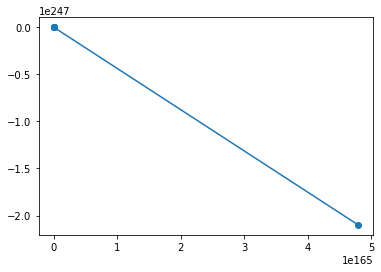

In [258]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=20)

#fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/Users/shrewdli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/Users/shrewdli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


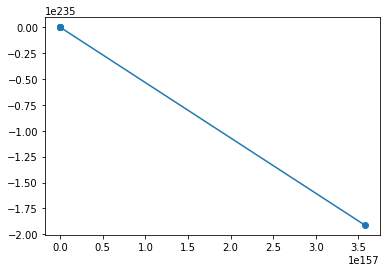

In [259]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=10)

#fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/Users/shrewdli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/Users/shrewdli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


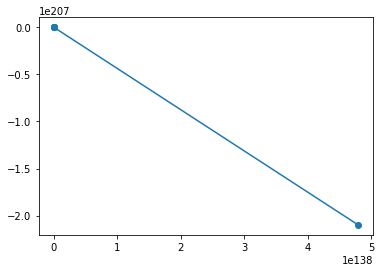

In [260]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=2)

#fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 2.4. Write a Gradient Descent With Momentum algorithm for finding the mini-mum. Visualize your results with a few different settings of the algorithm'shyperparameters.

In [261]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
  # your code here
    if not starting_point:
        point = np.random.uniform(-10, 10, size=2)
    else:
        point = starting_point
    trajectory = [point]
    v = np.zeros(point.size)

    for i in range(iterations):
        grad = grad_f(point[0], point[1])
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

/Users/shrewdli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/Users/shrewdli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


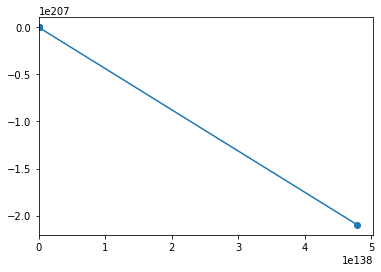

In [262]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/Users/shrewdli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/Users/shrewdli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


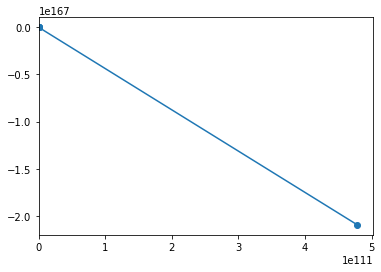

In [263]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=.2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/Users/shrewdli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/Users/shrewdli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


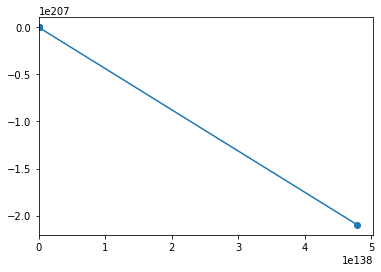

In [264]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=2, alpha=5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 3. Backprop

### 3.2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [265]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24,  b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12,w_13,w_14],[w_21,w_22,w_23,w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))
    


In [266]:
def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    # forward pass
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    # backward pass
    dL_dc = binary_xent_residual(y, y_hat).dot( y_hat*(1-y_hat) )
    
    dL_dv = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(h)
    
    dL_db = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(relu_derivative(a))*v
  
    dL_dw = x.T.dot(np.expand_dims((binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
             
    
    return np.array([dL_dw[0,0], dL_dw[0,1], dL_dw[0,2], dL_dw[0,3], dL_dw[1,0], dL_dw[1,1], dL_dw[1,2], dL_dw[1,3],
                     dL_db[0], dL_db[1], dL_db[2], dL_db[3], dL_dv[0], dL_dv[1], dL_dv[2], dL_dv[3], dL_dc]) / len(y)


### 3.3. Generate a synthetic dataset like the XOR pattern (see below).

In [267]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y = np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

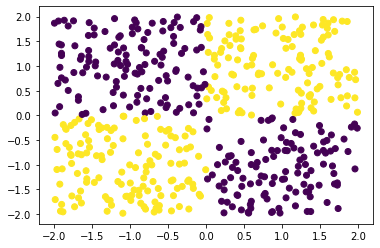

In [268]:
plt.scatter(x[:,0],x[:,1],c=y)

### 3.4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [269]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=17).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

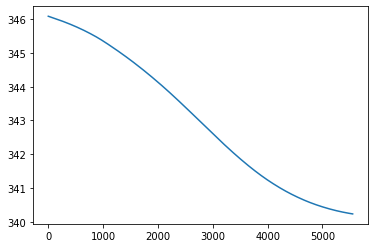

In [270]:
traj, losses = grad_descent(x, y, iterations=5550,learning_rate=1e-2)
plt.plot(losses)

### 3.5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [271]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    point = np.random.uniform(-.1,.1,size=17).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    v = np.zeros(point.size)

    for i in range(iterations):
        grad = grad_f(point[0], point[1])
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

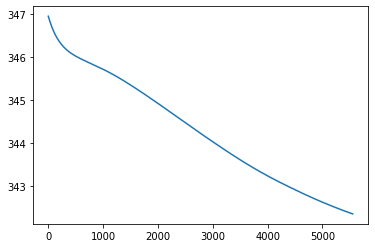

In [272]:
traj, losses = grad_descent(x, y, iterations=5550,learning_rate=1e-2)
plt.plot(losses)

Based on the observation, the gradient descent with momentum converges more efficiently than plain gradient descent.

### 3.6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

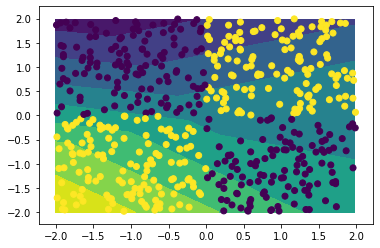

In [273]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)